In [1]:
import numpy as np

#Generating a permutation sample

#In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have
#identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a
#function to generate a permutation sample from two data sets.

#Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the
#arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the
#permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

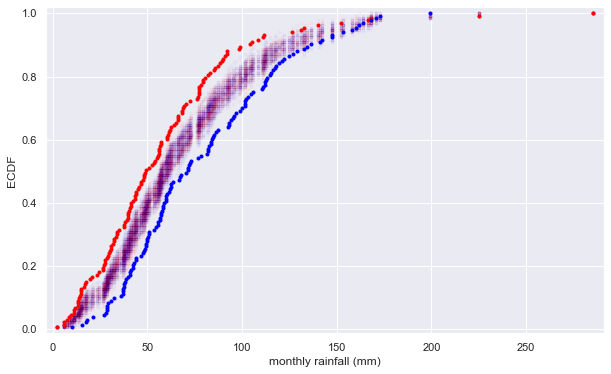

In [2]:
#Visualizing permutation sampling

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
np.random.seed(42)
plt.figure(figsize=(10,6))
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
                      104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
                       27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
                       66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
                       13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
                       77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
                       27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
                       85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
                       85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
                       70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
                       44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
                      225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
                       68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
                       46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
                      168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
                           44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
                          112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
                          102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
                           57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
                          118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
                           59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
                          158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
                           67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
                           40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
                           28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
                          117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
                           73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
                          167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
                          161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

#To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them
#graphically.

#We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and
#November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how
#their ECDFs would look if they were identically distributed.

#The data are stored in the Numpy arrays rain_june and rain_november.

#As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) with a return value of
#permuted_data[:len(data_1)], permuted_data[len(data_1):],
#where permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [3]:
#NOTE: Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation
#samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data.
#June and November rainfall are not identically distributed.

In [4]:
#Test statistics

#When performing hypothesis tests, your choice of test statistic should be:

#Possible Answers

#something well-known, like the mean or median.

#be a parameter that can be estimated.

#be pertinent to the question you are seeking to answer in your hypothesis test.*

In [5]:
#What is a p-value?

#The p-value is generally a measure of:

#Possible Answers

#the probability that the hypothesis you are testing is true.

#the probability of observing your data if the hypothesis you are testing is true.

#the probability of observing a test statistic equally or more extreme than the one you observed, given that the null
#hypothesis is true.*

In [6]:
#Generating permutation replicates

#As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As
#the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to
#have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this
#exercise.

#The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that
#takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

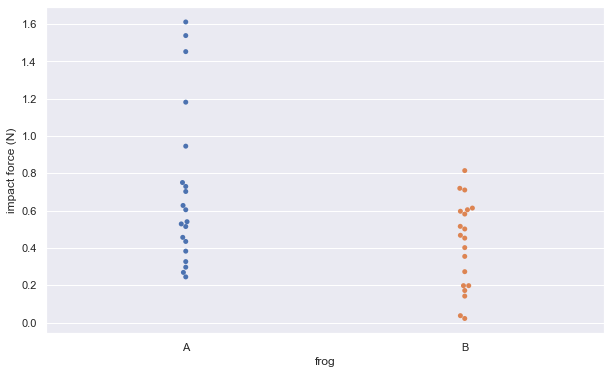

In [7]:
#Look before you leap: EDA before hypothesis testing

import pandas as pd
pd.set_option('display.max_rows', None) #Mostrar todas las filas
df_ = pd.read_csv('datasets/frog_tongue.csv', comment='#')
df = df_[(df_['ID'] == 'II') | (df_['ID'] == 'IV')][['ID', 'impact force (mN)']]
df['ID'] = df['ID'].replace('II', 'A')
df['ID'] = df['ID'].replace('IV', 'B')
df['impact force (mN)'] = df['impact force (mN)'] * 1e-3
df.rename(columns={'impact force (mN)':'impact_force'}, inplace=True)
plt.figure(figsize=(10,6))

#Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They
#held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force
#and adhesive force of the frog's tongue when it struck the target.

#Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the
#next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember,
#it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df,
#where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [8]:
#NOTE: it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes,
#and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too
#difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

In [9]:
#Permutation test on frog data

np.random.seed(42)
force_a = df[df['ID'] == 'A']['impact_force'].values
force_b = df[df['ID'] == 'B']['impact_force'].values

#The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is
#possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability
#of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces
#for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this
#hypothesis.

#For your convenience, the data has been stored in the arrays force_a and force_b.

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0063


In [10]:
#NOTE: The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the
#experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but:
#warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no
#phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the
#same!

In [11]:
#A one-sample bootstrap hypothesis test

np.random.seed(42)
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

#Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces.
#Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you
#don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from
#Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean
#strike force of Frog B is equal to that of Frog C.

#To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate
#the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that
#the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B
#such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from
#each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0046


In [12]:
#NOTE: The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

In [13]:
#A two-sample bootstrap hypothesis test for difference of means

np.random.seed(42)
forces_concat = np.concatenate((force_a, force_b))
empirical_diff_means = np.mean(force_a) - np.mean(force_b)

#We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same
#distribution, which is also impossible with a permutation test.

#To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis
#that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference
#in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates
#with a difference in means greater than or equal to what was observed.

#The objects forces_concat and empirical_diff_means are already in your namespace.

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0043


In [14]:
#NOTE: You got a similar result as when you did the permutation test. Nonetheless, remember that it is important to
#carefully think about what question you want to ask. Are you only interested in the mean impact force, or in the
#distribution of impact forces?